In [1]:
# import libraries
import os
import sys
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import nilearn
import nibabel as nib
import glob
from pathlib import Path
import readmat

In [62]:
HOME_DIR = str(Path.home())
PROJ_DIR = os.path.join(HOME_DIR,'Documents/Magic_fMRI/DATA/MRI')
RESULTS_DIR_6MP = os.path.join(PROJ_DIR,'derivatives','spm12','spm12-fla','WholeBrain',
                               'VideoTypes','6mm-smoothed-mnispace','SpecialMoment')
RESULTS_DIR_24MP = os.path.join(PROJ_DIR,'derivatives','spm12','spm12-fla','WholeBrain_24MP',
                               'VideoTypes','6mm-smoothed-mnispace','SpecialMoment')
RESULTS_DIR_24MP_WM_CSF = os.path.join(PROJ_DIR,'derivatives','spm12','spm12-fla','WholeBrain_24MP_WM_CSF',
                               'VideoTypes','6mm-smoothed-mnispace','SpecialMoment')
RESULTS_DIR_24MP_WM_CSF_GS = os.path.join(PROJ_DIR,'derivatives','spm12','spm12-fla','WholeBrain_24MP_WM_CSF_GS',
                               'VideoTypes','6mm-smoothed-mnispace','SpecialMoment')
RESULTS_DIR_24MP_WM2_CSF2_GS = os.path.join(PROJ_DIR,'derivatives','spm12','spm12-fla',
                               'WholeBrain_24MP_WM2_CSF2_GS','VideoTypes','6mm-smoothed-mnispace','SpecialMoment')
subjects = glob.glob(os.path.join(RESULTS_DIR_6MP,'sub-*'))
subjects = [os.path.basename(sub) for sub in subjects]
subjects.sort()

#exampl_SPM = readmat.load(os.path.join(RESULTS_DIR_6MP,subjects[0],'SPM.mat'),isStruct=True)['SPM']['xCon']

In [3]:
pd.DataFrame(exampl_SPM).name

0                     Magic vs Control
1                     Control vs Magic
2              Magic vs Control Before
3              Control vs Magic Before
4          Magic Before vs Magic After
5          Magic After vs Magic Before
6             Magic vs Surprise Before
7              Surpise vs Magic Before
8                  Surprise vs Control
9                  Control vs Surprise
10              Magic vs Control After
11              Control vs Magic After
12             Magic vs Surprise After
13              Surpise vs Magic After
14    MagPre-ConPre vs MagPost-ConPost
15    MagPost-ConPost vs MagPre-ConPre
16           Magic PreVsPre (run 1vs2)
17          Magic PreVsPost (run 2vs3)
18     Control Before vs Control After
19                   Video vs Response
20                   Response vs Video
Name: name, dtype: object

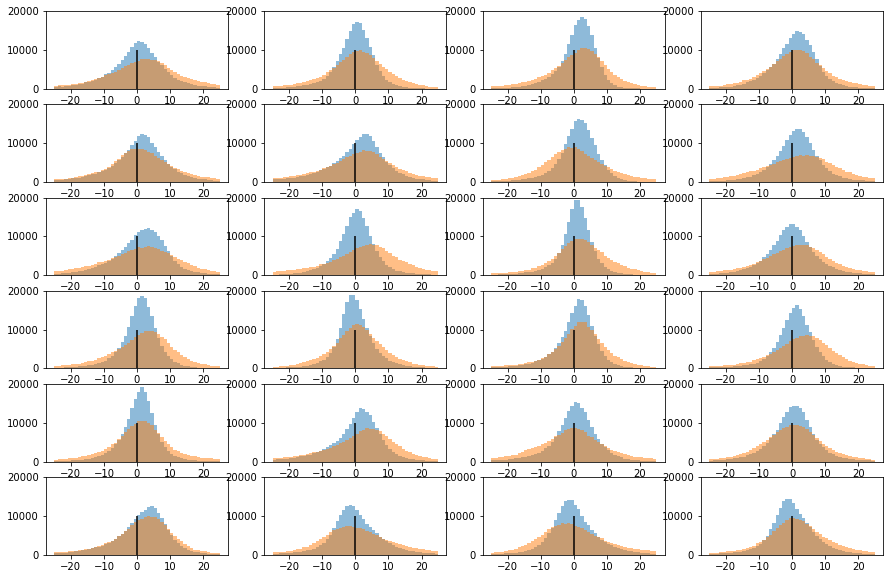

In [34]:
strange_cons = [8,9] # that is Surprise>Magic before and Surprise>Control
fig = plt.figure(figsize=(15,10))

skews_6 = np.zeros((len(strange_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(strange_cons):
        current_con = os.path.join(RESULTS_DIR_6MP,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews_6[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/2);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))

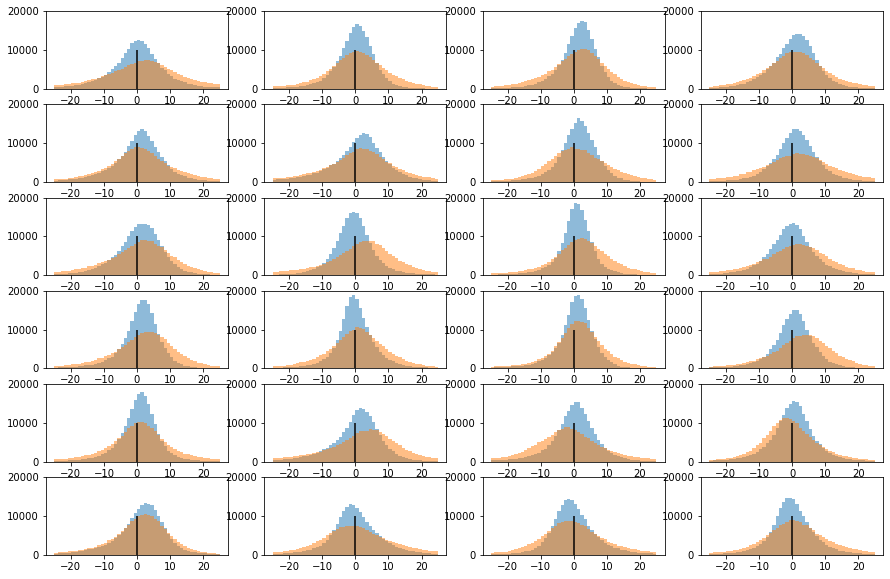

In [12]:
strange_cons = [8,9] # that is Surprise>Magic before and Surprise>Control
fig = plt.figure(figsize=(15,10))

skews_24 = np.zeros((len(strange_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(strange_cons):
        current_con = os.path.join(RESULTS_DIR_24MP,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews_24[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/2);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))

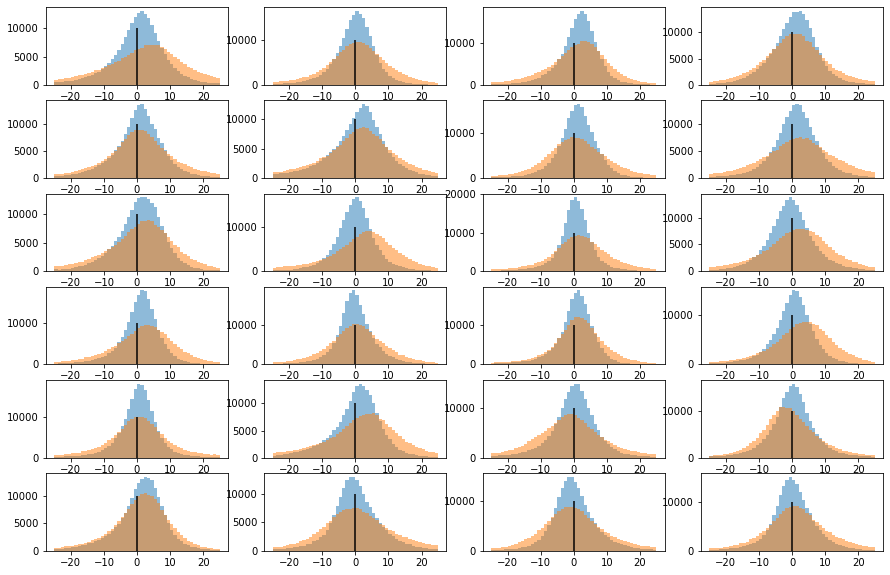

In [13]:
strange_cons = [8,9] # that is Surprise>Magic before and Surprise>Control
fig = plt.figure(figsize=(15,10))

skews_24_WM_CSF = np.zeros((len(strange_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(strange_cons):
        current_con = os.path.join(RESULTS_DIR_24MP_WM_CSF,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews_24_WM_CSF[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/2);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    #plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))

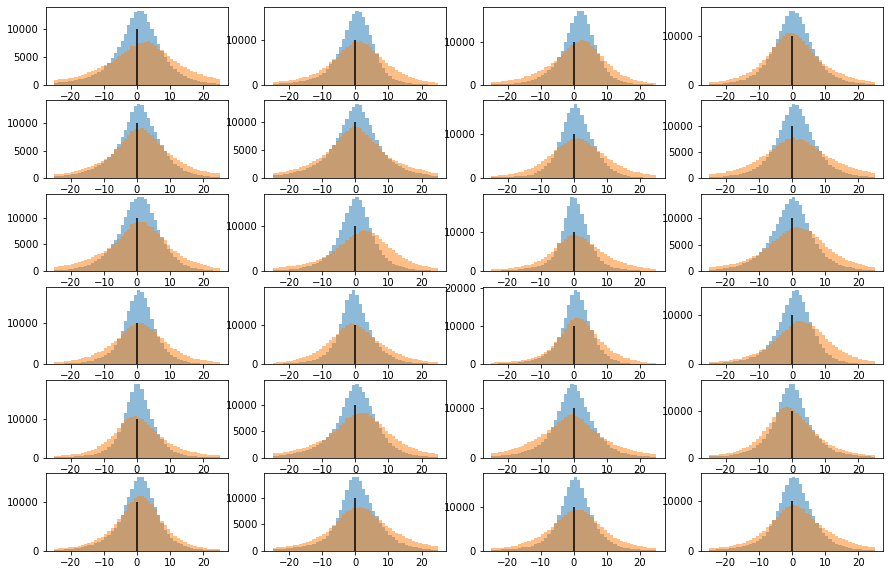

In [71]:
strange_cons = [8,9] # that is Surprise>Magic before and Surprise>Control
fig = plt.figure(figsize=(15,10))

skews_24_WM_CSF_GS = np.zeros((len(strange_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(strange_cons):
        current_con = os.path.join(RESULTS_DIR_24MP_WM_CSF_GS,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews_24_WM_CSF_GS[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/2);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    #plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))

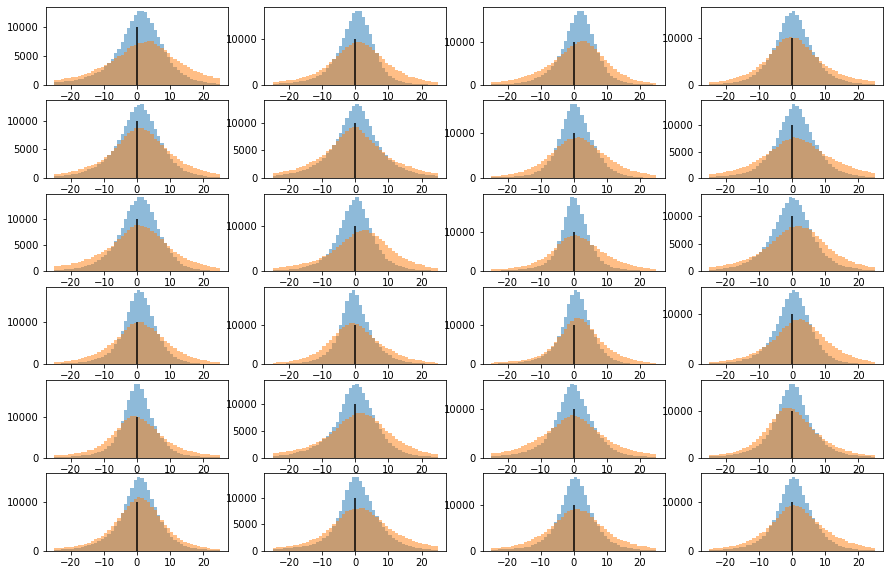

In [68]:
strange_cons = [8,9] # that is Surprise>Magic before and Surprise>Control
fig = plt.figure(figsize=(15,10))

skews_24_WM2_CSF2_GS = np.zeros((len(strange_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(strange_cons):
        current_con = os.path.join(RESULTS_DIR_24MP_WM2_CSF2_GS,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews_24_WM2_CSF2_GS[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/2);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    #plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))

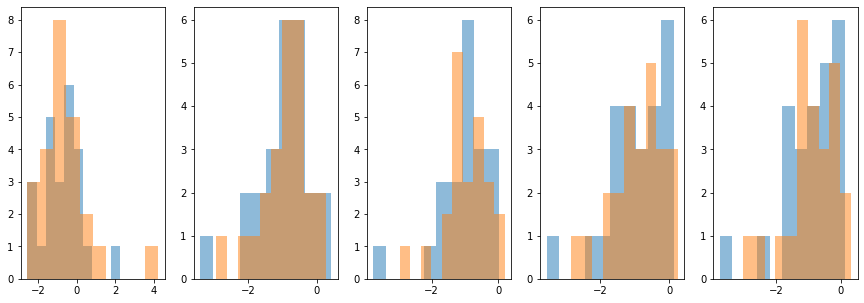

In [72]:
fig = plt.figure(figsize=(15,5))
ax0 = fig.add_subplot(151)
ax1 = fig.add_subplot(152)
ax2 = fig.add_subplot(153)
ax3 = fig.add_subplot(154)
ax4 = fig.add_subplot(155)

ax0.hist(skews_6[0,:],alpha=.5)
ax0.hist(skews_6[1,:],alpha=.5);

ax1.hist(skews_24[0,:],alpha=.5)
ax1.hist(skews_24[1,:],alpha=.5)

ax2.hist(skews_24_WM_CSF[0,:],alpha=.5)
ax2.hist(skews_24_WM_CSF[1,:],alpha=.5);

ax3.hist(skews_24_WM_CSF_GS[0,:],alpha=.5)
ax3.hist(skews_24_WM_CSF_GS[1,:],alpha=.5);

ax4.hist(skews_24_WM2_CSF2_GS[0,:],alpha=.5)
ax4.hist(skews_24_WM2_CSF2_GS[1,:],alpha=.5);

In [76]:
skews_24_WM2_CSF2_GS

array([[-1.45981206, -1.12819845, -0.8813351 ,  0.05660367, -1.10143517,
         0.10825155, -0.40273189, -0.81237582, -0.49376421, -0.2683457 ,
        -3.72454386, -0.03409382, -1.33021953, -0.86030188, -1.52084149,
        -1.02995375, -0.48247554, -0.40989098, -0.18428784, -0.18093617,
        -1.80216838, -1.49925337, -2.21162922, -0.64109604],
       [-1.30089712, -1.23320773, -0.48281587, -0.18419566, -1.12393378,
         0.30734464, -0.57786989, -0.1915863 ,  0.29094772, -0.71937103,
        -3.0118792 , -1.12541938, -1.51827077, -0.46676927, -2.43141175,
        -1.17032919, -0.28393121, -0.94769719, -0.26568466, -0.04678582,
        -0.71576989, -1.69291098, -1.22745774, -0.94718989]])

In [75]:
skews_24_WM2_CSF2_GS.mean(axis=0)>np.quantile(skews_24_WM2_CSF2_GS.mean(axis=0),.25)

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True, False, False,  True])

In [74]:
np.quantile(skews_24_WM2_CSF2_GS,.25,axis=1)

array([-1.36261766, -1.22889524])

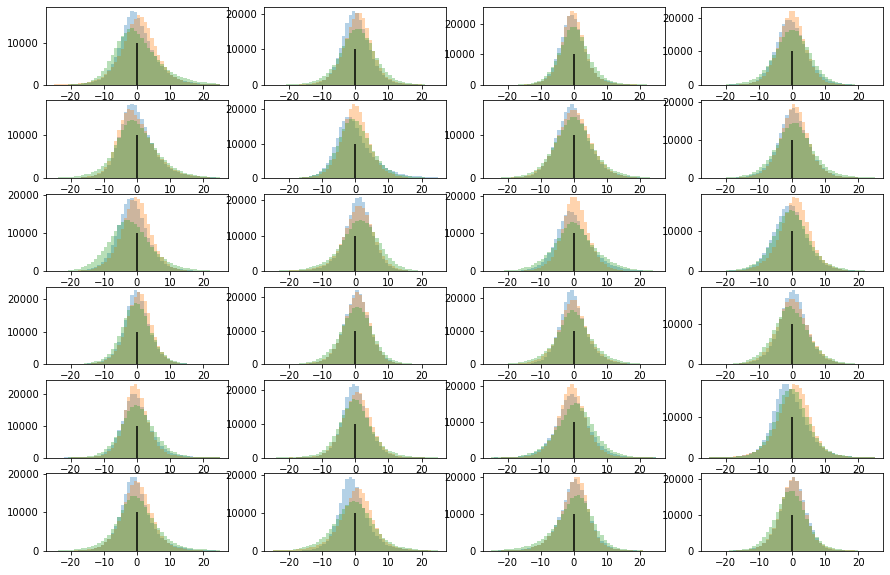

In [18]:
reasonable_cons = [3,5,15] # those are magic>control pre, magic pre>post and interaction
fig = plt.figure(figsize=(15,10))

skews = np.zeros((len(reasonable_cons),len(subjects)))
for s, sub in enumerate(subjects):
    fig.add_subplot(6,4,s+1)
    for c,con in enumerate(reasonable_cons):
        current_con = os.path.join(RESULTS_DIR_24MP,sub, 'con_{:04}.nii'.format(con))

        con_img = nib.load(current_con)
        con_data = con_img.get_fdata()
        con_data = con_data.flatten()
        con_data = con_data[~np.isnan(con_data)]
        
        skews[c,s] = st.skew(con_data)

        plt.hist(con_data,bins=50,range=(-25, 25),alpha=1/3);
    plt.vlines(x=0,ymin=0,ymax=10000,colors='black')
    #plt.ylim(0,20000)
#    print('sub-{:02} min value={}    max value={}'.format(s+1,con_data.min(),con_data.max()))